<a href="https://colab.research.google.com/github/sudhanshu3721/mcd/blob/main/Feynnlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Load the dataset
vac = pd.read_csv("/content/mcdonalds.csv")

In [106]:
vac.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [11]:
# Display column names
print("Column Names:")
print(vac.columns.tolist())

Column Names:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [5]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
print("\nDataset Dimensions:", vac.shape)


Dataset Dimensions: (1453, 15)


In [8]:
summary = vac[['yummy', 'spicy', 'cheap', 'tasty']].describe(include='all')
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
       yummy spicy cheap tasty
count   1453  1453  1453  1453
unique     2     2     2     2
top      Yes    No   Yes   Yes
freq     803  1317   870   936


In [26]:
yummy_counts = vac['yummy'].value_counts(dropna=False)
tasty_counts = vac['tasty'].value_counts(dropna=False)
cheap_counts = vac['cheap'].value_counts(dropna=False)

print("\nGender Distribution:")
print(yummy_counts)

print("\ntasty Distribution:")
print("tasty_counts")

print("\ncheap Distribution:")
print(cheap_counts)


Gender Distribution:
yummy
Yes    803
No     650
Name: count, dtype: int64

tasty Distribution:
tasty_counts

cheap Distribution:
cheap
Yes    870
No     583
Name: count, dtype: int64


In [29]:
if 'Age' in vac.columns:

    vac['Age'] = pd.to_numeric(vac['Age'], errors='coerce')
    vac = vac[(vac['Age'] >= 0) & (vac['Age'] <= 110)]

In [30]:
# Standardizing categorical columns
if 'Gender' in vac.columns:
    vac['Gender'] = vac['Gender'].str.strip().str.capitalize()
    vac = vac[vac['Gender'].isin(['Male', 'Female'])]

In [31]:
vac.to_csv("mcdonalds_cleaned.csv", index=False)
print("\nCleaned dataset saved as mcdonalds_cleaned.csv")


Cleaned dataset saved as mcdonalds_cleaned.csv


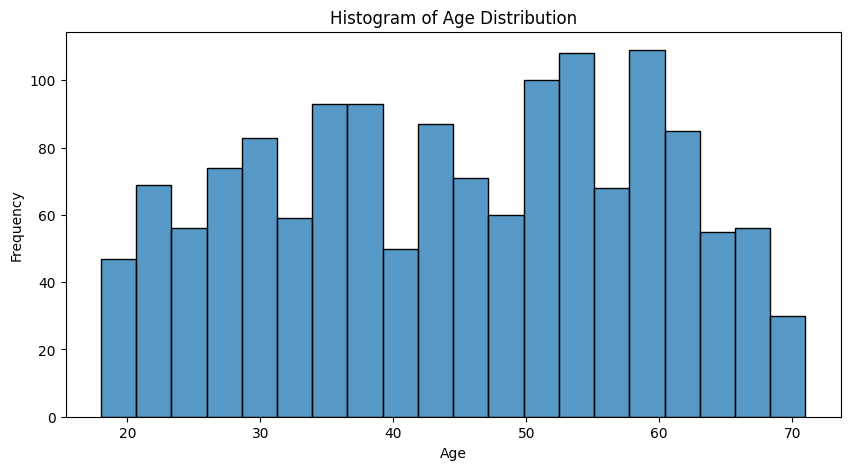

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(vac['Age'], bins=20, kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

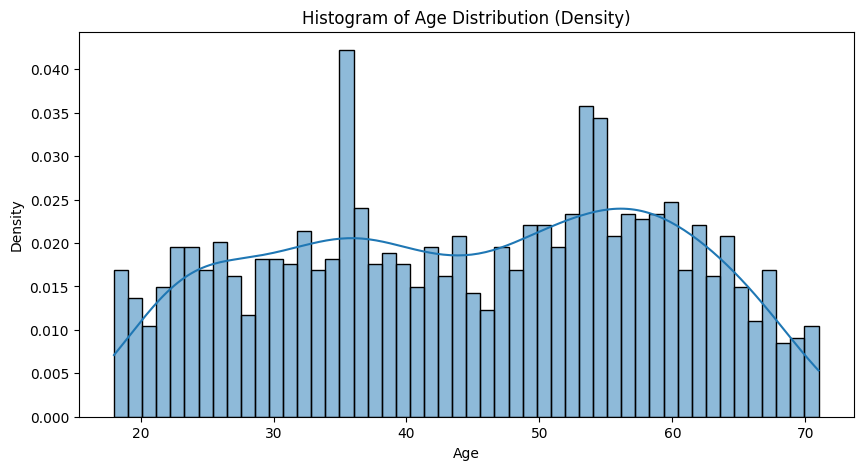

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(vac['Age'], bins=50, kde=True, stat="density")
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age Distribution (Density)')
plt.show()

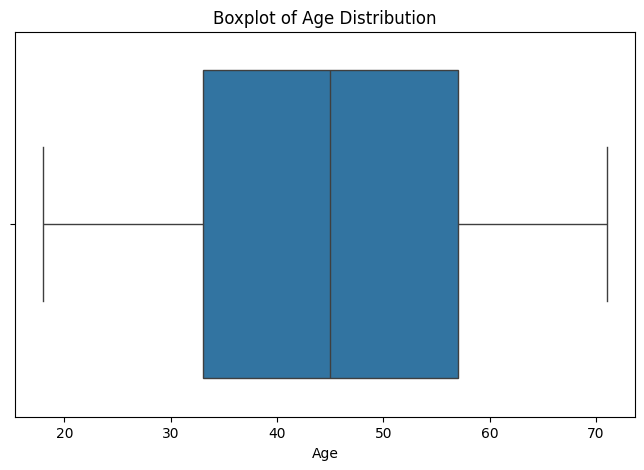

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=vac['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age Distribution')
plt.show()

In [68]:
categorical_cols = vac.columns[12:32]
yes_percent = 100 * vac[categorical_cols].apply(lambda col: (col == "yes").mean())
yes_percent_sorted = yes_percent.sort_values()


In [61]:
# Print dataset structure
print("Dataset Columns:", vac.columns)

# Check column index range
print("Selected Columns for Dot Chart:", vac.columns[12:32])

# Check unique values in each categorical column
for col in vac.columns[12:32]:
    print(f"Unique values in {col}: {vac[col].unique()}")


Dataset Columns: Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Selected Columns for Dot Chart: Index(['Age', 'VisitFrequency', 'Gender'], dtype='object')
Unique values in Age: ['61' '51' '62' '69' '49' '55' '56' '23' '58' '32' '53' '28' '65' '54'
 '67' '34' '31' '47' '37' '41' '36' '50' '39' '35' '20' '24' '44' '40'
 '48' '38' '57' '60' '66' '42' '26' '52' '29' '25' '22' '45' '18' '68'
 '43' '21' '27' '33' '63' '46' '59' '19' '64' '70' '30' '71']
Unique values in VisitFrequency: ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Unique values in Gender: ['Female' 'Male']


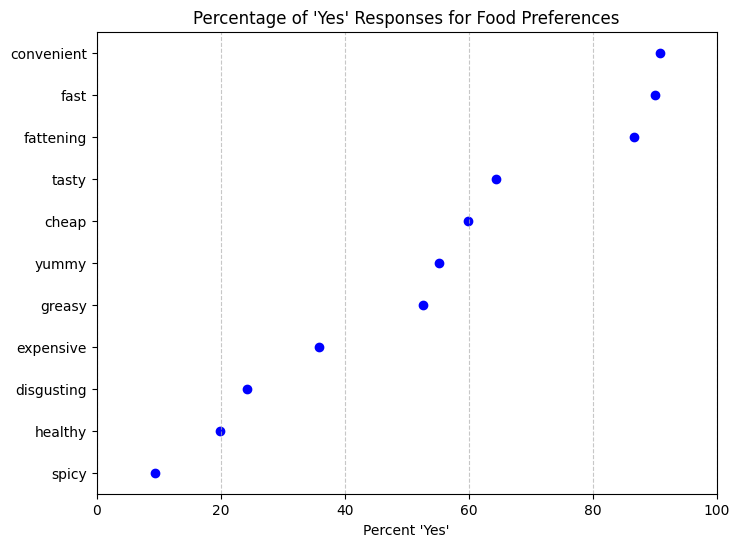

In [72]:
# Dot Chart for categorical responses
food_columns = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Compute the percentage of 'Yes' responses
yes_percent = (vac[food_columns] == "Yes").mean() * 100

# Sort values
yes_percent = yes_percent.sort_values()

# Dot chart
plt.figure(figsize=(8, 6))
plt.scatter(yes_percent, yes_percent.index, color='blue')
plt.xlabel("Percent 'Yes'")
plt.xlim(0, 100)
plt.title("Percentage of 'Yes' Responses for Food Preferences")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [103]:
binary_cols = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast",
               "cheap", "tasty", "expensive", "healthy", "disgusting"]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x.lower() == "yes" else 0)

<ipython-input-103-a0b08d46a0e7>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x.lower() == "yes" else 0)


AttributeError: 'int' object has no attribute 'lower'

In [107]:
file_path = "mcdonalds.csv"  # Update path if necessary
vac = pd.read_csv(file_path)

# Convert Yes/No categorical columns to numeric (1/0)
binary_cols = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap",
               "tasty", "expensive", "healthy", "disgusting"]

for col in binary_cols:
    vac[col] = vac[col].map({'Yes': 1, 'No': 0})

# Convert 'Like' column to numeric
vac['Like'] = pd.to_numeric(vac['Like'], errors='coerce')

# Convert categorical columns ('VisitFrequency' and 'Gender') using one-hot encoding
vac = pd.get_dummies(vac, columns=['VisitFrequency', 'Gender'], drop_first=True)

# Save the processed dataset
processed_file_path = "mcdonalds_processed.csv"
vac.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved as: {processed_file_path}")

Processed dataset saved as: mcdonalds_processed.csv


In [109]:
df = pd.read_csv('/content/mcdonalds_processed.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,False,False,False,False,False,False
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,False,False,False,False,False,False
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,False,False,False,False,False,False
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,False,False,False,True,False,False
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,False,False,True,False,False,True


In [110]:
from sklearn.preprocessing import StandardScaler, RobustScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


standardized_file_path = "mcdonalds_standardized.csv"
df.to_csv(standardized_file_path, index=False)

print(f"Standardized dataset saved as: {standardized_file_path}")

Standardized dataset saved as: mcdonalds_standardized.csv


In [111]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
numeric_cols = vac.select_dtypes(include=[np.number]).columns
data = vac[numeric_cols].dropna()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [114]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

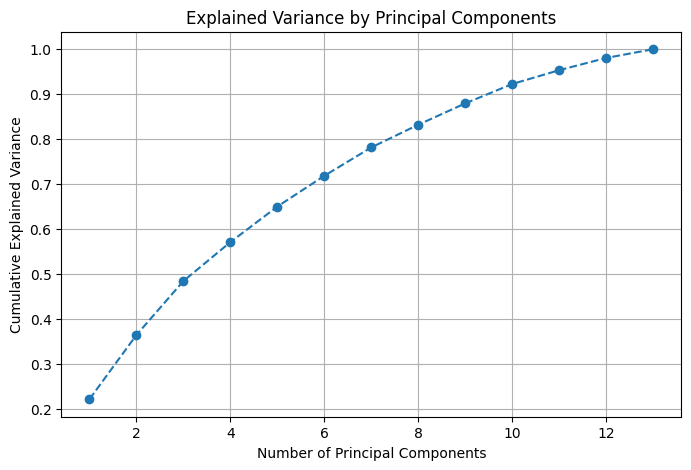

In [115]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

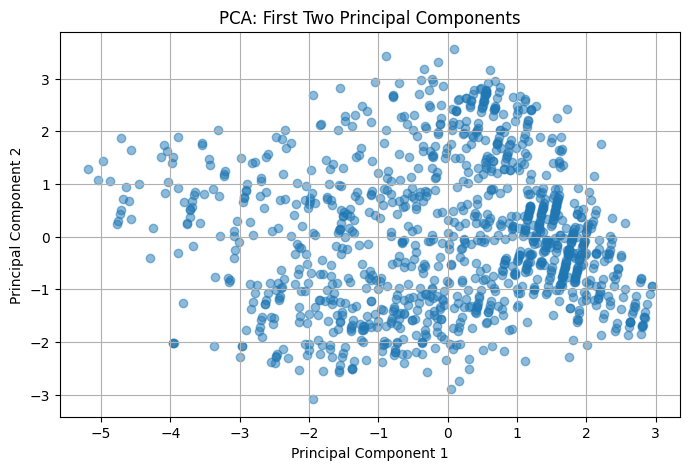

In [116]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid()
plt.show()


In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Explained Variance by each PC: [0.24100466 0.13628903 0.1213163  0.08439764 0.08026935 0.06563659
 0.0579365  0.04770603 0.04253397 0.04154665 0.03848767 0.02313333
 0.01974228]
Cumulative Explained Variance: [0.24100466 0.37729369 0.49860999 0.58300763 0.66327698 0.72891357
 0.78685007 0.8345561  0.87709007 0.91863671 0.95712439 0.98025772
 1.        ]


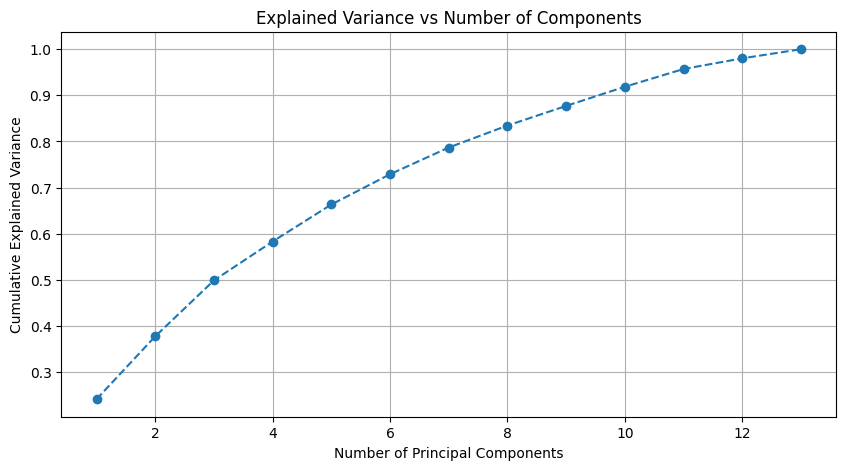

Principal Component Loadings:
         yummy  convenient     spicy  fattening    greasy      fast     cheap  \
PC1   0.427828    0.273902  0.007789  -0.150699 -0.232733  0.172683  0.222928   
PC2   0.294593   -0.038482 -0.044304   0.124843  0.166502 -0.218819 -0.523710   
PC3   0.062287    0.195295 -0.139252   0.533755  0.425264  0.271061  0.269730   
PC4   0.019444    0.245092  0.835545   0.113532  0.229927  0.245475 -0.050027   
PC5  -0.131059    0.439623 -0.182641   0.213903 -0.342521  0.296711 -0.309770   
PC6  -0.090585    0.243677 -0.291738  -0.282933  0.067398  0.499158 -0.115217   
PC7   0.083816   -0.590131  0.020325  -0.020128 -0.135503  0.658343 -0.026688   
PC8   0.059191   -0.044185 -0.261036   0.625886 -0.022203 -0.045876  0.056808   
PC9  -0.005189    0.239766 -0.247935  -0.360239  0.612927  0.026712 -0.040789   
PC10 -0.070167    0.399967  0.097542  -0.001136 -0.387038 -0.090303  0.047063   

         tasty  expensive   healthy  disgusting      Like       Age  
PC1   0.

In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

vac_numeric = vac.select_dtypes(include=[np.number])


imputer = SimpleImputer(strategy='mean')
vac_imputed = imputer.fit_transform(vac_numeric)


scaler = StandardScaler()
vac_scaled = scaler.fit_transform(vac_imputed)


n_components = min(vac_scaled.shape[0], vac_scaled.shape[1])
vac_pca = pca.fit_transform(vac_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


print("Explained Variance by each PC:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)


plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

# Display principal component loadings
loadings = pd.DataFrame(pca.components_, columns=vac_numeric.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))]) #use vac_numeric.columns instead of df_numeric
print("Principal Component Loadings:")
print(loadings.head(10))